# PART 1.2

## imports

In [1]:
import pandas as pd
from pprint import pprint
import seaborn as sns
from pathlib import Path
from datetime import datetime
from enum import Enum
import matplotlib.pyplot as plt

## Loading data

In [2]:
data_dir = Path('../data')

In [3]:
data_path = data_dir / 'Dataset2.csv'
df = pd.read_csv(data_path)

# Data manipulation

In [4]:
df

,zcta,time_period,population,Start date,end date,case count,test count,positive tests,case rate,test rate,positivity rate
0,95129,32,39741,10/11/2020,10/31/2020,22.0,2543.0,23.0,2.6,304.7,0.9
1,95129,43,39741,5/30/2021,6/19/2021,NaN,3315.0,14.0,1.1,397.2,0.4
2,95129,40,39741,3/28/2021,4/17/2021,34.0,4816.0,37.0,4.1,577.1,0.8
3,95129,55,39741,2/6/2022,2/26/2022,110.0,10194.0,175.0,13.2,1221.5,1.7
4,95129,44,39741,6/20/2021,7/10/2021,14.0,3033.0,17.0,1.7,363.4,0.6
...,...,...,...,...,...,...,...,...,...,...,...
332,94085,59,23223,1-May,21-May,165.0,2315.0,192.0,33.8,474.7,8.3
333,94085,63,23223,24-Jul,13-Aug,150.0,1348.0,190.0,30.8,276.4,14.1
334,94085,61,23223,12-Jun,2-Jul,219.0,1696.0,255.0,44.9,347.8,15.0
335,94085,27,23223,28-Jun,18-Jul,53.0,1379.0,61.0,10.9,282.8,4.4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   zcta             337 non-null    int64  
 1   time_period      337 non-null    int64  
 2   population       337 non-null    int64  
 3   Start date       337 non-null    object 
 4   end date         337 non-null    object 
 5   case count       311 non-null    float64
 6   test count       325 non-null    float64
 7   positive tests   310 non-null    float64
 8   case rate        337 non-null    float64
 9   test rate        337 non-null    float64
 10  positivity rate  337 non-null    float64
dtypes: float64(6), int64(3), object(2)
memory usage: 29.1+ KB


We notice that we have some missing values in the columns 'test count', 'case count' and 'positive tests'

In [6]:
df.dropna(inplace=True)

In [7]:
def float_to_int(input_df: pd.DataFrame, columns: list[str]) -> pd.DataFrame:
    for column in columns:
        input_df[column] = input_df[column].astype(int)
float_to_int(df, ['test count', 'case count', 'positive tests'])

<p> we notice that we have two columns with type object that represents dates, we should transform them into time series </p>

In [8]:
pprint(df['Start date'].unique())

array(['10/11/2020', '3/28/2021', '2/6/2022', '6/20/2021', '1/16/2022',
       '8/30/2020', '9/20/2020', '9/25/2022', '9/12/2021', '11/22/2020',
       '11/1/2020', '2/14/2021', '6/12/2022', '7/3/2022', '10/24/2021',
       '9/4/2022', '10/3/2021', '6/28/2020', '1/24/2021', '12/13/2020',
       '1/3/2021', '5/22/2022', '3/7/2021', '8/9/2020', '4/18/2021',
       '4/10/2022', '7/11/2021', '10/16/2022', '12/5/2021', '7/19/2020',
       '8/22/2021', '8/1/2021', '12/26/2021', '2/27/2022', '3/20/2022',
       '6/7/2020', '5/1/2022', '8/14/2022', '11/14/2021', '7/24/2022',
       '5/30/2021', '4/5/2020', '3/15/2020', '5/17/2020', '5/9/2021',
       '2/23/2020', '4/26/2020', '5-Apr', '22-Nov', '11-Oct', '1-Nov',
       '9-Aug', '24-Jul', '14-Nov', '28-Mar', '12-Jun', '19-Jul', '7-Mar',
       '4-Sep', '10-Apr', '30-Aug', '28-Jun', '16-Oct', '15-Mar',
       '20-Jun', '20-Sep', '25-Sep', '14-Feb', '1-May', '3-Jul', '7-Jun',
       '20-Mar', '12-Sep', '22-Aug', '11-Jul', '30-May', '3-Jan', '3-O

In [9]:
pprint(df['end date'].unique())

array(['10/31/2020', '4/17/2021', '2/26/2022', '7/10/2021', '2/5/2022',
       '9/19/2020', '10/10/2020', '10/15/2022', '10/2/2021', '12/12/2020',
       '11/21/2020', '3/6/2021', '7/2/2022', '7/23/2022', '11/13/2021',
       '9/24/2022', '10/23/2021', '7/18/2020', '2/13/2021', '1/2/2021',
       '1/23/2021', '6/11/2022', '3/27/2021', '8/29/2020', '5/8/2021',
       '4/30/2022', '7/31/2021', '11/5/2022', '12/25/2021', '8/8/2020',
       '9/11/2021', '8/21/2021', '1/15/2022', '3/19/2022', '4/9/2022',
       '6/27/2020', '5/21/2022', '9/3/2022', '12/4/2021', '8/13/2022',
       '6/19/2021', '4/25/2020', '4/4/2020', '6/6/2020', '5/29/2021',
       '3/14/2020', '5/16/2020', '25-Apr', '12-Dec', '31-Oct', '21-Nov',
       '29-Aug', '13-Aug', '4-Dec', '17-Apr', '2-Jul', '8-Aug', '27-Mar',
       '24-Sep', '30-Apr', '19-Sep', '18-Jul', '5-Nov', '4-Apr', '10-Jul',
       '10-Oct', '15-Oct', '6-Mar', '21-May', '23-Jul', '27-Jun', '9-Apr',
       '2-Oct', '11-Sep', '31-Jul', '19-Jun', '23-Jan', '

we notice that we have different format of dates, we should fix that

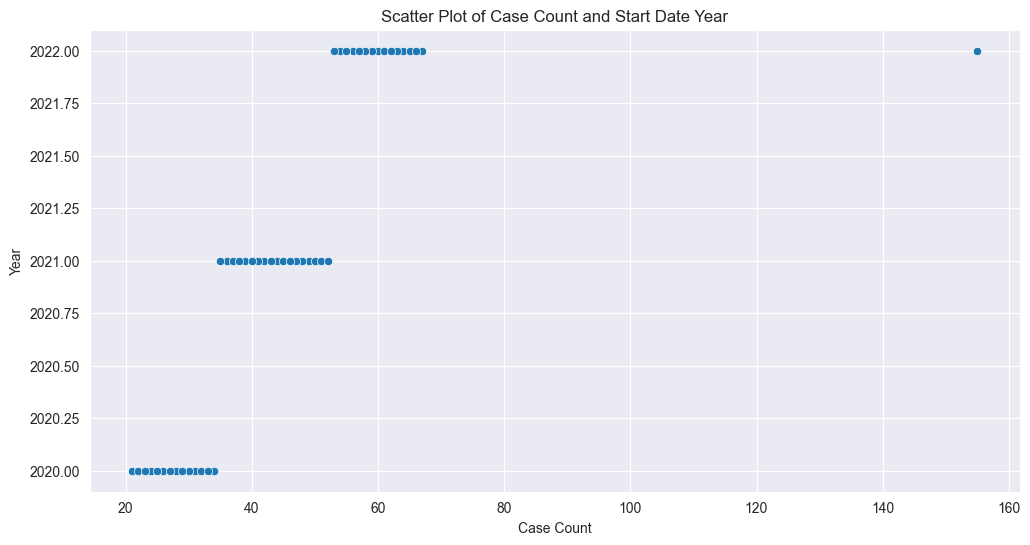

In [10]:
plt.figure(figsize=(12, 6))
sns.scatterplot(y=pd.to_datetime(df['end date'], errors='coerce').dt.year, x=df['time_period'])
plt.ylabel('Year')
plt.xlabel('Case Count')
plt.title('Scatter Plot of Case Count and Start Date Year')
plt.show()

In [11]:
def get_max_min_period_by_year(input_df: pd.DataFrame) -> pd.DataFrame:
    return input_df.groupby(pd.to_datetime(input_df['end date'], errors='coerce').dt.year).agg({'time_period': ['min', 'max']}).reset_index()

get_max_min_period_by_year(df)

end date time_period     
                   min  max
0   2020.0          21   34
1   2021.0          35   52
2   2022.0          53  155

We can notice that the year of the start date is related to the time period, so we can fix the dates by adding the current year to the date corresponding to the time period
- 0-20 days => 2019
- 20-35 days => 2020
- 35-53 days => 2021
- 53-155 days => 2022

In [12]:
def transform_date(input_df: pd.DataFrame) -> pd.DataFrame:
    """
    Fix dates that has different formats (e.g. 1-Jan-20, 1-Jan-2020, 1/1/2020) or has no year (e.g. 1-Jan)
    :param input_df:
    :return:
    """
    def time_period_to_year(time_period: int) -> int:
        if time_period <= 20:
            return 2019
        elif 20 < time_period <= 35:
            return 2020
        elif 35 < time_period <= 53:
            return 2021
        elif 53 < time_period:
            return 2022

    for index, row in input_df.iterrows():
        try:
            start_date = datetime.strptime(row['Start date'], '%m/%d/%Y')
            end_date = datetime.strptime(row['end date'], '%m/%d/%Y')
        except ValueError:
            start_date = datetime.strptime(row['Start date'], '%d-%b')
            end_date = datetime.strptime(row['end date'], '%d-%b')
            new_year = time_period_to_year(row['time_period'])
            start_date = start_date.replace(year=new_year)
            end_date = end_date.replace(year=new_year) if end_date.month >= start_date.month else end_date.replace(year=new_year + 1)

        input_df.at[index, 'Start date'] = start_date
        input_df.at[index, 'end date'] = end_date

    input_df['Start date'] = pd.to_datetime(input_df['Start date'])
    input_df['end date'] = pd.to_datetime(input_df['end date'])
    return input_df


transform_date(df)
df

,zcta,time_period,population,Start date,end date,case count,test count,positive tests,case rate,test rate,positivity rate
0,95129,32,39741,2020-10-11,2020-10-31,22,2543,23,2.6,304.7,0.9
2,95129,40,39741,2021-03-28,2021-04-17,34,4816,37,4.1,577.1,0.8
3,95129,55,39741,2022-02-06,2022-02-26,110,10194,175,13.2,1221.5,1.7
4,95129,44,39741,2021-06-20,2021-07-10,14,3033,17,1.7,363.4,0.6
5,95129,54,39741,2022-01-16,2022-02-05,624,13479,817,74.8,1615.1,6.1
...,...,...,...,...,...,...,...,...,...,...,...
332,94085,59,23223,2022-05-01,2022-05-21,165,2315,192,33.8,474.7,8.3
333,94085,63,23223,2022-07-24,2022-08-13,150,1348,190,30.8,276.4,14.1
334,94085,61,23223,2022-06-12,2022-07-02,219,1696,255,44.9,347.8,15.0
335,94085,27,23223,2020-06-28,2020-07-18,53,1379,61,10.9,282.8,4.4


In [13]:
pprint(df['end date'].unique())

<DatetimeArray>
['2020-10-31 00:00:00', '2021-04-17 00:00:00', '2022-02-26 00:00:00',
 '2021-07-10 00:00:00', '2022-02-05 00:00:00', '2020-09-19 00:00:00',
 '2020-10-10 00:00:00', '2022-10-15 00:00:00', '2021-10-02 00:00:00',
 '2020-12-12 00:00:00', '2020-11-21 00:00:00', '2021-03-06 00:00:00',
 '2022-07-02 00:00:00', '2022-07-23 00:00:00', '2021-11-13 00:00:00',
 '2022-09-24 00:00:00', '2021-10-23 00:00:00', '2020-07-18 00:00:00',
 '2021-02-13 00:00:00', '2021-01-02 00:00:00', '2021-01-23 00:00:00',
 '2022-06-11 00:00:00', '2021-03-27 00:00:00', '2020-08-29 00:00:00',
 '2021-05-08 00:00:00', '2022-04-30 00:00:00', '2021-07-31 00:00:00',
 '2022-11-05 00:00:00', '2021-12-25 00:00:00', '2020-08-08 00:00:00',
 '2021-09-11 00:00:00', '2021-08-21 00:00:00', '2022-01-15 00:00:00',
 '2022-03-19 00:00:00', '2022-04-09 00:00:00', '2020-06-27 00:00:00',
 '2022-05-21 00:00:00', '2022-09-03 00:00:00', '2021-12-04 00:00:00',
 '2022-08-13 00:00:00', '2021-06-19 00:00:00', '2020-04-25 00:00:00',
 '20

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 0 to 336
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   zcta             303 non-null    int64         
 1   time_period      303 non-null    int64         
 2   population       303 non-null    int64         
 3   Start date       303 non-null    datetime64[ns]
 4   end date         303 non-null    datetime64[ns]
 5   case count       303 non-null    int32         
 6   test count       303 non-null    int32         
 7   positive tests   303 non-null    int32         
 8   case rate        303 non-null    float64       
 9   test rate        303 non-null    float64       
 10  positivity rate  303 non-null    float64       
dtypes: datetime64[ns](2), float64(3), int32(3), int64(3)
memory usage: 33.0 KB


In [15]:
def treat_data(input_df: pd.DataFrame) -> pd.DataFrame:
    input_df.drop_duplicates(inplace=True)
    input_df = input_df[input_df['test count'] >= input_df['positive tests']]
    input_df = input_df[input_df['Start date'] <= input_df['end date']]
    return input_df


def regroup_data_by_date(input_df: pd.DataFrame) -> pd.DataFrame:
    return input_df.groupby(['Start date', 'end date']).agg({'test count': 'sum', 'case count': 'sum', 'positive tests': 'sum'}).reset_index()

df = treat_data(df)
df_by_date = regroup_data_by_date(df)
df_by_date

,Start date,end date,test count,case count,positive tests
0,2020-02-23,2020-03-14,31,20,20
1,2020-03-15,2020-04-04,1038,155,158
2,2020-04-05,2020-04-25,1597,151,178
3,2020-04-26,2020-05-16,1558,49,112
4,2020-05-17,2020-06-06,4024,66,82
5,2020-06-07,2020-06-27,13033,270,309
6,2020-06-28,2020-07-18,19370,621,694
7,2020-07-19,2020-08-08,18401,712,810
8,2020-08-09,2020-08-29,18999,593,692
9,2020-08-30,2020-09-19,18704,446,504


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 336
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   zcta             302 non-null    int64         
 1   time_period      302 non-null    int64         
 2   population       302 non-null    int64         
 3   Start date       302 non-null    datetime64[ns]
 4   end date         302 non-null    datetime64[ns]
 5   case count       302 non-null    int32         
 6   test count       302 non-null    int32         
 7   positive tests   302 non-null    int32         
 8   case rate        302 non-null    float64       
 9   test rate        302 non-null    float64       
 10  positivity rate  302 non-null    float64       
dtypes: datetime64[ns](2), float64(3), int32(3), int64(3)
memory usage: 24.8 KB


In [17]:
class PlotType(Enum):
    LINE = 'line plot'
    BOX = 'box plot'


def plot(input_df, *, plot_type: PlotType) -> None:
    match plot_type:
        case PlotType.LINE:
            sns.lineplot(x=input_df['Start date'], y=input_df['test count'], label='Tests')
            sns.lineplot(x=input_df['Start date'], y=input_df['case count'], label='Confirmed Cases')
            sns.lineplot(x=input_df['Start date'], y=input_df['positive tests'], label='Positive Tests')
            plt.xticks(rotation=45)
            plt.xlabel('Time')
            plt.ylabel('Count')

        case PlotType.BOX:
            sns.boxplot(data=input_df[['test count', 'case count', 'positive tests']])
            plt.ylabel('Count')
        case _:
            raise ValueError('Invalid plot type')
    plt.title('Evolution of COVID-19 Tests and Cases Over Time')
    plt.legend()
    plt.show()

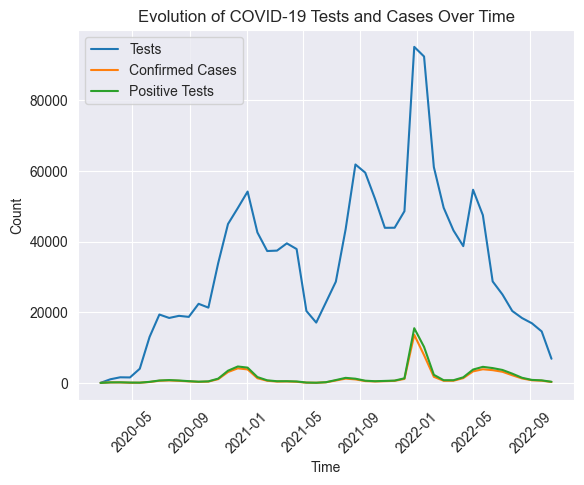

In [18]:
plot(df_by_date, plot_type=PlotType.LINE)

# regroup and plot data by zone

In [19]:
def regroup_data_by_zone(input_df: pd.DataFrame) -> pd.DataFrame:
    return input_df.groupby(['zcta']).agg({'case count': 'sum', 'positive tests': 'sum'}).reset_index()
df_by_zone = regroup_data_by_zone(df)
df_by_zone

,zcta,case count,positive tests
0,94085,4389,5233
1,94086,7749,9000
2,94087,8105,9478
3,95035,15335,18068
4,95127,19816,23268
5,95128,8778,10531
6,95129,6091,7157


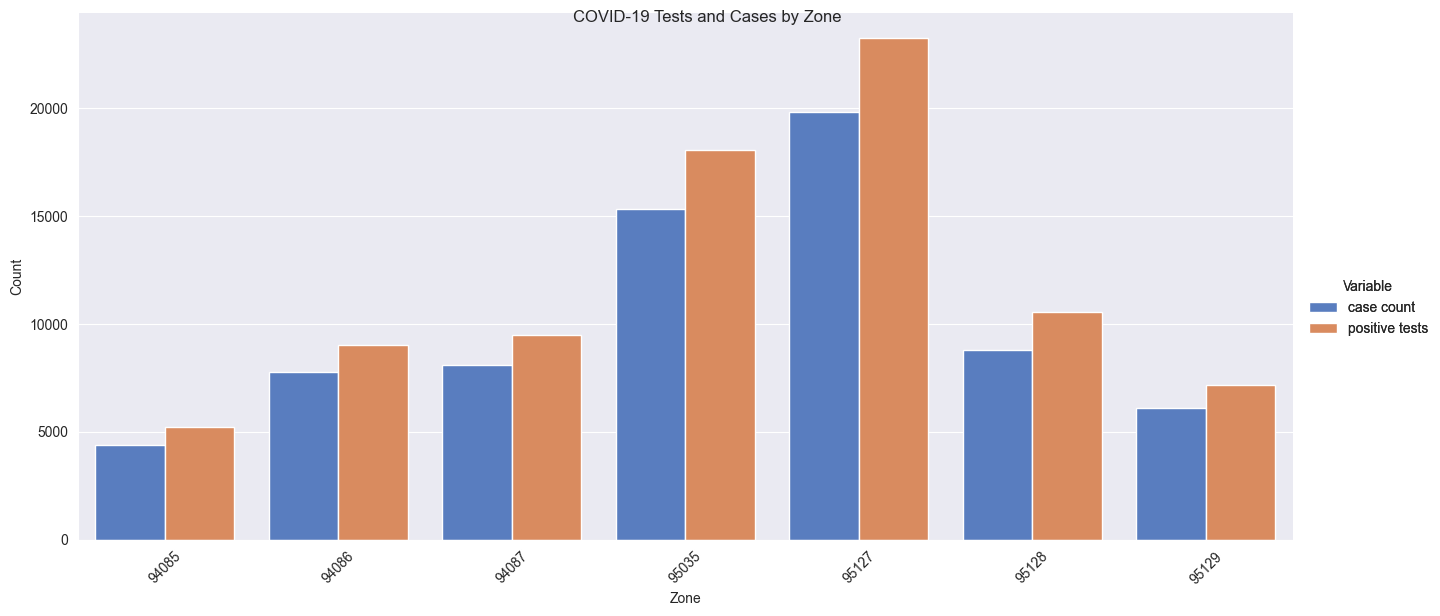

In [20]:
g = sns.catplot(x='zcta', y='value', hue='variable', data=pd.melt(df_by_zone, id_vars='zcta'), kind='bar', height=6, aspect=2, palette='muted')

g.set_xticklabels(rotation=45)
g.set_axis_labels('Zone', 'Count')
g.fig.suptitle('COVID-19 Tests and Cases by Zone')
g.add_legend(title='Variable')

plt.show()

In [21]:
def get_random_zone_df(input_df: pd.DataFrame, zone: int =None) -> pd.DataFrame:
    if zone is None:
        zone = input_df['zcta'].sample(1).values[0]
    df_random_zone = input_df[input_df['zcta'] == zone]
    return df_random_zone

def regroup_data_by_year(input_df: pd.DataFrame, zone=None) -> pd.DataFrame:
    df_random_zone = get_random_zone_df(input_df, zone)
    return df_random_zone.groupby([df['Start date'].dt.year, 'zcta']).agg({'test count': 'sum', 'case count': 'sum', 'positive tests': 'sum'}).reset_index()

df_year = regroup_data_by_year(df, 95129)

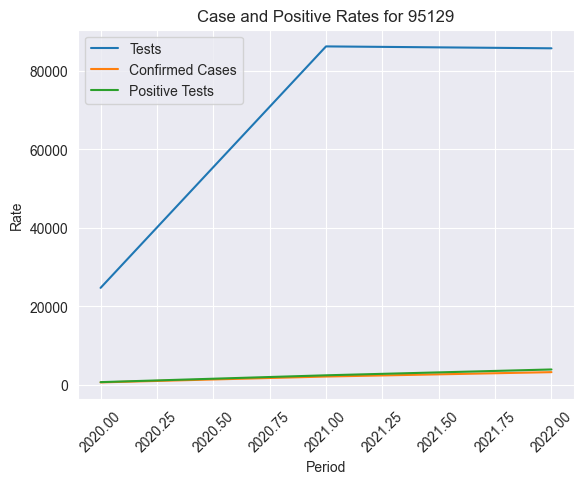

In [22]:
def plot_zone_data(input_df: pd.DataFrame) -> None:
    sns.lineplot(x=input_df['Start date'], y=input_df['test count'], label='Tests')
    sns.lineplot(x=input_df['Start date'], y=input_df['case count'], label='Confirmed Cases')
    sns.lineplot(x=input_df['Start date'], y=input_df['positive tests'], label='Positive Tests')

    plt.xlabel('Period')
    plt.ylabel('Rate')
    plt.xticks(rotation=45)
    plt.title(f'Case and Positive Rates for {input_df["zcta"].values[0]}')
    plt.legend()
    plt.show()

plot_zone_data(df_year)


In [23]:
def regroup_data_by_month(input_df: pd.DataFrame, zone=None) -> pd.DataFrame:
    df_random_zone = get_random_zone_df(input_df, zone)
    input_df =  df_random_zone.resample('M', on='Start date').agg({'zcta': 'first', 'test count': 'sum', 'case count': 'sum', 'positive tests': 'sum'}).reset_index()
    return input_df[input_df['test count'] != 0]

df_month = regroup_data_by_month(df, 95129)

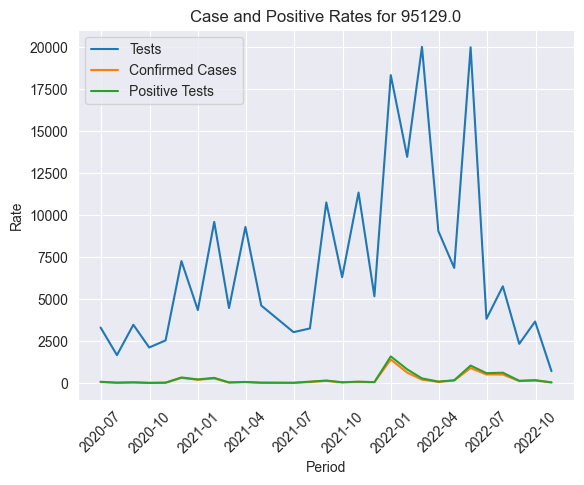

In [24]:
plot_zone_data(df_month)

In [25]:
def regroup_data_by_week(input_df: pd.DataFrame, zone=None) -> pd.DataFrame:
    df_random_zone = get_random_zone_df(input_df, zone)
    input_df =  df_random_zone.resample('W-Mon', on='Start date').agg({'zcta': 'first', 'test count': 'sum', 'case count': 'sum', 'positive tests': 'sum'}).reset_index()
    return input_df[input_df['test count'] != 0]

df_week = regroup_data_by_week(df, 95129)

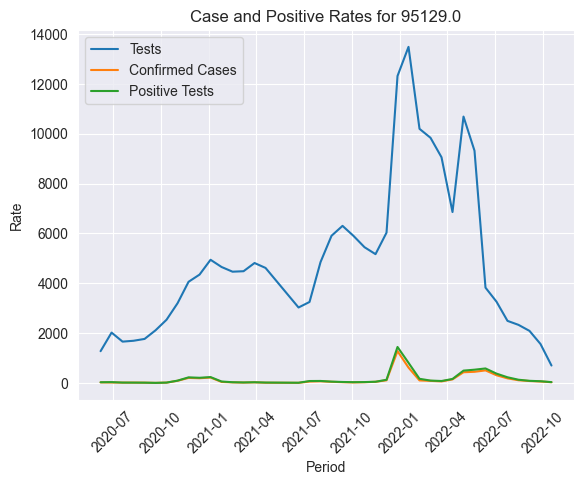

In [26]:
plot_zone_data(df_week)

In [27]:
def group_by_year_zone(input_df):
    return input_df.groupby([input_df['Start date'].dt.year, 'zcta']).agg({'positive tests': 'sum'}).reset_index()

df_year_zone = group_by_year_zone(df)

,Start date,zcta,positive tests
0,2020,94085,773
1,2020,94086,1316
2,2020,94087,910
3,2020,95035,2509
4,2020,95127,5444
5,2020,95128,2026
6,2020,95129,731
7,2021,94085,2048
8,2021,94086,3242
9,2021,94087,3536


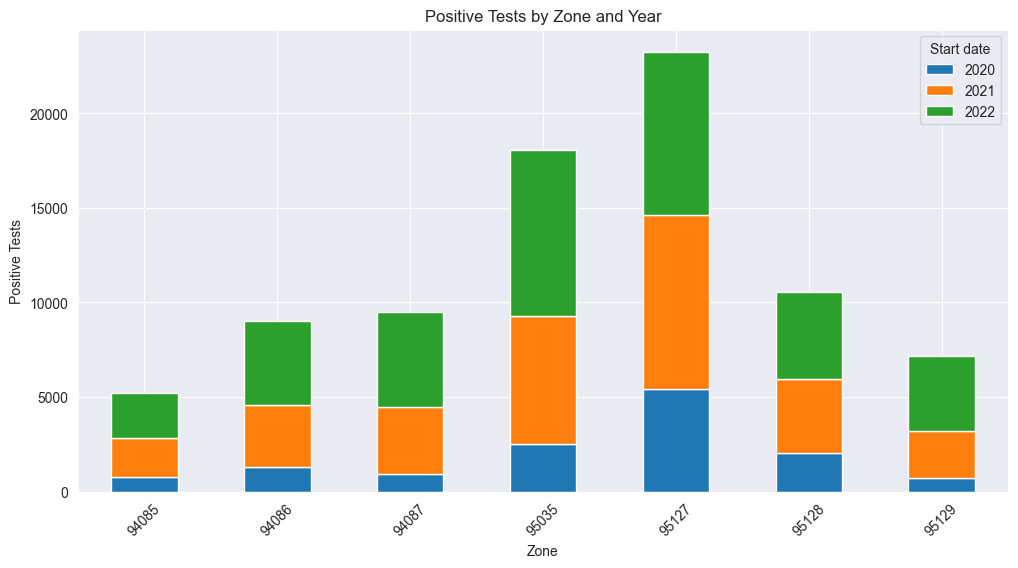

In [28]:
sns.barplot(x='Start date', y='positive tests', hue='zcta', data=df_year_zone)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Positive Tests')
plt.title('Positive Tests by Year and Zone')
plt.show()

In [29]:
def population_by_zone(input_df: pd.DataFrame):
    return input_df.groupby(['zcta']).agg({'population': 'sum', 'test count': 'sum'}).reset_index()

df_population = population_by_zone(df)

We plot a scatter plot of the population and the number of tests to get an idea about the correlation between them

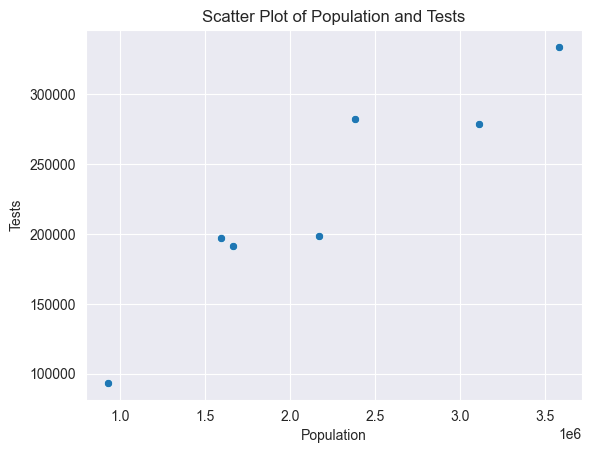

In [30]:
sns.scatterplot(x='population', y='test count', data=df_population)
plt.xlabel('Population')
plt.ylabel('Tests')
plt.title('Scatter Plot of Population and Tests')
plt.show()

we notice that there is a correlation between the population and the number of tests, so we can use the population to predict the number of tests

# Get most affected zone

In [31]:
def get_most_affected_zones(input_df: pd.DataFrame) -> pd.DataFrame:
    return input_df.groupby(['zcta']).agg({'case count': 'sum'}).reset_index().sort_values(by='case count', ascending=False)

get_most_affected_zones(df)

,zcta,case count
4,95127,19816
3,95035,15335
5,95128,8778
2,94087,8105
1,94086,7749
6,95129,6091
0,94085,4389


In [32]:
def get_most_affected_zones_by_case_ratio(input_df: pd.DataFrame) -> pd.DataFrame:
    return input_df.groupby(['zcta']).agg({'case count': 'sum', 'test count': 'sum'}).reset_index().assign(ratio=lambda x: x['case count'] / x['test count']).sort_values(by='ratio', ascending=False)

get_most_affected_zones_by_case_ratio(df)

,zcta,case count,test count,ratio
4,95127,19816,278239,0.071219
0,94085,4389,93345,0.047019
3,95035,15335,333689,0.045956
5,95128,8778,191434,0.045854
1,94086,7749,198272,0.039083
6,95129,6091,196670,0.030971
2,94087,8105,282174,0.028723


In [33]:
def get_most_affected_zones_by_positive_rate(input_df: pd.DataFrame) -> pd.DataFrame:
    return input_df.groupby(['zcta']).agg({'positive tests': 'sum', 'test count': 'sum'}).reset_index().assign(ratio=lambda x: x['positive tests'] / x['test count']).sort_values(by='ratio', ascending=False)

get_most_affected_zones_by_positive_rate(df)

,zcta,positive tests,test count,ratio
4,95127,23268,278239,0.083626
0,94085,5233,93345,0.056061
5,95128,10531,191434,0.055011
3,95035,18068,333689,0.054146
1,94086,9000,198272,0.045392
6,95129,7157,196670,0.036391
2,94087,9478,282174,0.033589


# Plot most affected zone

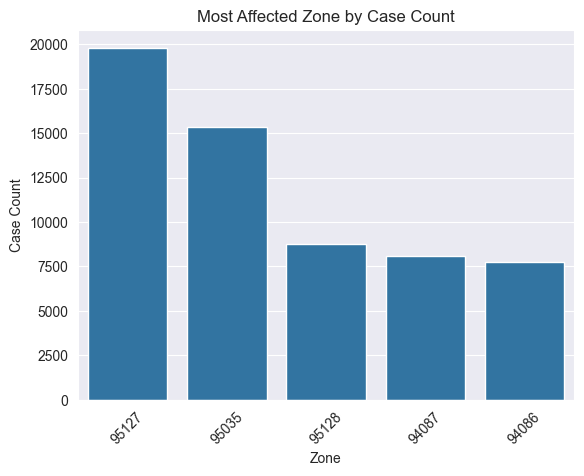

In [34]:
def plot_most_affected_zone_by_case_count(input_df: pd.DataFrame, *, number_of_zones=None) -> None:
    data = input_df.head(number_of_zones) if number_of_zones is not None else input_df
    sns.barplot(x='zcta', y='case count', data=data, order=data.sort_values(by='case count', ascending=False)['zcta'])
    plt.xticks(rotation=45)
    plt.xlabel('Zone')
    plt.ylabel('Case Count')
    plt.title('Most Affected Zone by Case Count')
    plt.show()

plot_most_affected_zone_by_case_count(get_most_affected_zones(df), number_of_zones=5)